# Gauss-Newton for XRD

a simple example

In [10]:
from XRDXRFutils import GaussNewton,DataXRD,SpectraXRD,DatabaseXRD,PhaseList,PhaseSearch

from matplotlib.pyplot import xlim,ylim,xlabel,ylabel,legend,plot,fill_between,imshow,subplots,sca,figure
from numpy import prod,array,minimum,maximum,log,zeros,trapz,where
from multiprocessing import Pool

### loading data

In [11]:
path = '/home/zdenek/Projects/pyMaXRDXRF/M491/ProfiloXRD/'

spectra = SpectraXRD().from_file(path + 'Frame1600.dat')
spectra.opt = [-1186.6, 1960.3, 51]

database = DatabaseXRD().read_cifs('/home/zdenek/Projects/XRDXRFutils/Database')

lazurite = database['Lazurite'][0]
hydrocerussite = database['Hydrocerussite'][0]
cinnabar = database['Cinnabar'][0]
barite = database['Barite'][0]
spinel = database['Spinel'][0]
calcite = database['Calcite'][0]

phases = PhaseList([hydrocerussite,lazurite,cinnabar,barite,spinel,calcite])

Text(0, 0.5, 'relative intensity')

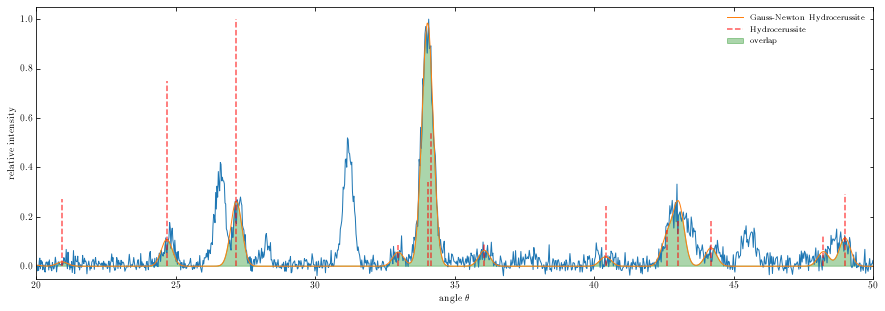

In [16]:
%matplotlib inline

figure(figsize=(15,5))

phase_search = PhaseSearch(phases,spectra).search()
g = phase_search.select()

g.plot_spectra(lw=1)
g.plot('-',label='Gauss-Newton %s'%g.label,lw=1)
g.phase.plot('r',alpha=0.66)

fill_between(g.theta,g.overlap(),color='g',alpha=0.33,label='overlap')

legend(frameon=False)
ylim(-0.05,1.05)
xlim(20,50)
xlabel(r'angle $\theta$')
ylabel(r'relative intensity')